### Import Libraries and Modules for Analysis

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
pd.set_option('max_rows',2000)
pd.set_option('max_columns',1000)
import seaborn as sns 
from scipy.stats import expon, pearsonr, pearson3, norm
import itertools
from scipy.linalg import lu
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [62]:
housing_train = pd.read_csv('train.csv')
housing_train['test_train'] = 'train'
housing_test = pd.read_csv('test.csv')
housing_test['test_train'] = 'test'
housing_test['SalePrice'] = None
housing_all = pd.concat([housing_train,
                         housing_test]).reset_index()

/Users/jitsen/anaconda/envs/test-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


### 5 points.  Descriptive and Inferential Statistics. Provide univariate descriptive statistics and appropriate plots for the training data set.  Provide a scatterplot matrix for at least two of the independent variables and the dependent variable. Derive a correlation matrix for any three quantitative variables in the dataset.  Test the hypotheses that the correlations between each pairwise set of variables is 0 and provide an 80% confidence interval.  Discuss the meaning of your analysis.  Would you be worried about familywise error? Why or why not?

In [64]:
housing_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [65]:
housing_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

##### Look at Pairplot for Correlation

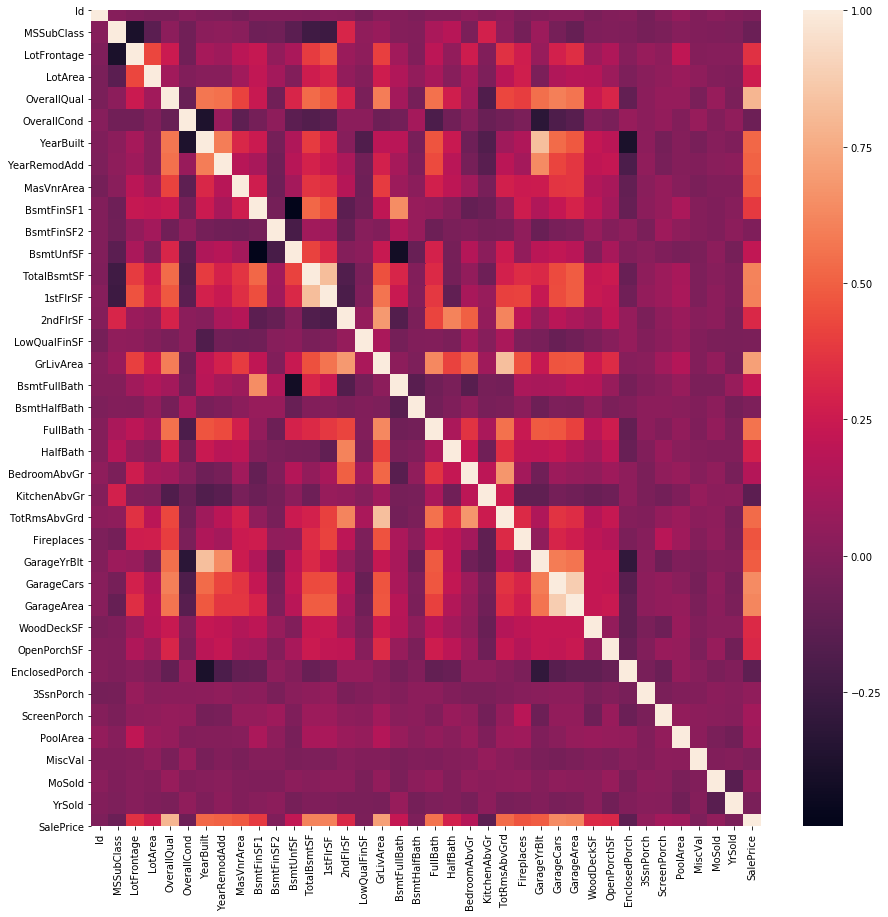

In [66]:
plt.figure(figsize=(15,15))
sns.heatmap(housing_train.corr());

#### Quickets way to Visualize Relationship of Sales Price to Other Variables

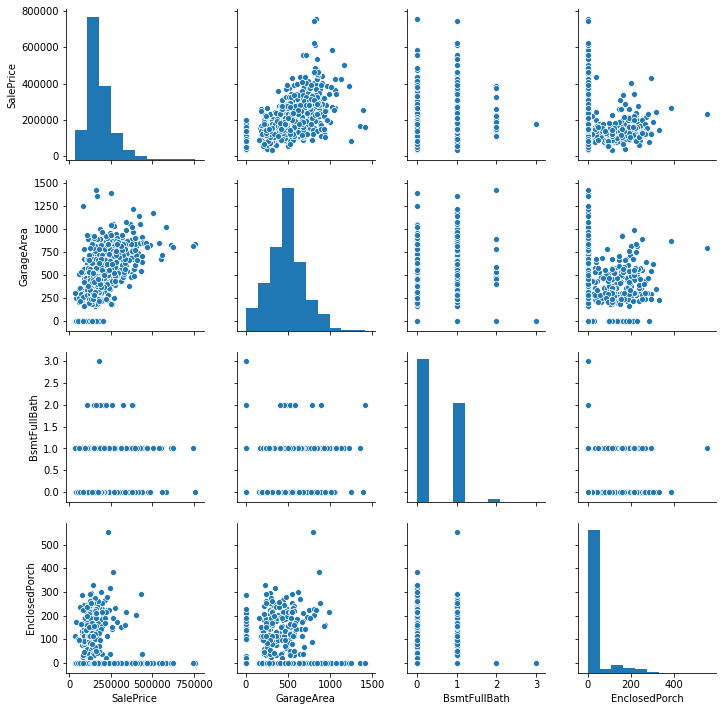

In [67]:
sns.pairplot(housing_train[['SalePrice','GarageArea','BsmtFullBath','EnclosedPorch']]);

In [69]:
housing_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
for col in housing_train.columns[housing_train.columns.str.contains('Qual|Qu|QC') &
                                 ~housing_train.columns.str.contains('Overall|Exter')]:
    print(housing_train[col].fillna('Not Found').value_counts())

TA           649
Gd           618
Ex           121
Not Found     37
Fa            35
Name: BsmtQual, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
Not Found    690
Gd           380
TA           313
Fa            33
Ex            24
Po            20
Name: FireplaceQu, dtype: int64
TA           1311
Not Found      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64
Not Found    1453
Gd              3
Fa              2
Ex              2
Name: PoolQC, dtype: int64


##### Check number of null values

In [10]:
for col in housing_train.columns:
    print(col,':', housing_train[col].dtype, [x for x in housing_train[col].isna().value_counts().items()])

Id : int64 [(False, 1460)]
MSSubClass : int64 [(False, 1460)]
MSZoning : object [(False, 1460)]
LotFrontage : float64 [(False, 1201), (True, 259)]
LotArea : int64 [(False, 1460)]
Street : object [(False, 1460)]
Alley : object [(True, 1369), (False, 91)]
LotShape : object [(False, 1460)]
LandContour : object [(False, 1460)]
Utilities : object [(False, 1460)]
LotConfig : object [(False, 1460)]
LandSlope : object [(False, 1460)]
Neighborhood : object [(False, 1460)]
Condition1 : object [(False, 1460)]
Condition2 : object [(False, 1460)]
BldgType : object [(False, 1460)]
HouseStyle : object [(False, 1460)]
OverallQual : int64 [(False, 1460)]
OverallCond : int64 [(False, 1460)]
YearBuilt : int64 [(False, 1460)]
YearRemodAdd : int64 [(False, 1460)]
RoofStyle : object [(False, 1460)]
RoofMatl : object [(False, 1460)]
Exterior1st : object [(False, 1460)]
Exterior2nd : object [(False, 1460)]
MasVnrType : object [(False, 1452), (True, 8)]
MasVnrArea : float64 [(False, 1452), (True, 8)]
ExterQual

##### Define function to get Pearsons correlation and confidence interval. Some inspiration from [this](https://zhiyzuo.github.io/Pearson-Correlation-CI-in-Python/) post

In [10]:
def pearsonr_ci(x,y,alpha=0.20):
    r, p = pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = norm.ppf(1-alpha/2)
    low_z, high_z = r_z-z*se, r_z+z*se
    low, high = np.tanh((low_z, high_z))
    return r, p, low, high

In [11]:
for x,y in itertools.combinations(['GarageArea','BsmtFullBath','EnclosedPorch'],2):
    print('Combination:',
          x,
          y,
         '\n Pearson r:',
         pearsonr(housing_train[x],
                  housing_train[y]),
         '\n Pearson ci:',
         pearsonr_ci(housing_train[x],
                     housing_train[y],
                     alpha=0.20)[2:])

Combination: GarageArea BsmtFullBath 
 Pearson r: (0.17918948042023092, 5.316849168529037e-12) 
 Pearson ci: (0.14650892982819325, 0.2114793061366275)
Combination: GarageArea EnclosedPorch 
 Pearson r: (-0.12177671956100417, 3.0641326414288424e-06) 
 Pearson ci: (-0.1547060713518165, -0.08857709690770775)
Combination: BsmtFullBath EnclosedPorch 
 Pearson r: (-0.04991064908375314, 0.05656746402293231) 
 Pearson ci: (-0.08333269946182702, -0.016376441401598656)


##### All p-values are low, so we can safely assume the correlation coefficients are not zero. However, the coefficients are low, which means we can assume the variables are fairly independent. In terms of familywise error, the error is : 1 – (1 – .05)^3 this becomes:

In [3]:
1 - (1 - .05)**3

0.1426250000000001

##### The above value is small, so we need not worry too much about it.

### 5 points. Linear Algebra and Correlation.  Invert your correlation matrix from above. (This is known as the precision matrix and contains variance inflation factors on the diagonal.) Multiply the correlation matrix by the precision matrix, and then multiply the precision matrix by the correlation matrix. Conduct LU decomposition on the matrix. 

In [12]:
corr_matrix = housing_train[['GarageArea',
                             'BsmtFullBath',
                             'EnclosedPorch']].corr()

In [13]:
precision_matrix = np.linalg.inv(corr_matrix)

In [14]:
a = corr_matrix.dot(precision_matrix)
b = precision_matrix.dot(corr_matrix)

##### Conduct Decomposition on the two matrices

In [15]:
p_a,l_a,u_a = lu(a)
p_b,l_b,u_b = lu(b)

In [16]:
l_a

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.35115178e-17,  1.00000000e+00,  0.00000000e+00],
       [-1.38777878e-17,  3.31883353e-35,  1.00000000e+00]])

In [17]:
l_b

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.39147159e-18,  1.00000000e+00,  0.00000000e+00],
       [ 5.11937099e-19, -3.27960026e-19,  1.00000000e+00]])

In [18]:
u_a

array([[ 1.00000000e+00,  2.39147159e-18,  5.11937099e-19],
       [ 0.00000000e+00,  1.00000000e+00, -3.27960026e-19],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [19]:
u_b

array([[ 1.00000000e+00,  3.35115178e-17, -1.38777878e-17],
       [ 0.00000000e+00,  1.00000000e+00,  3.31883353e-35],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

##### Test relationship between the respective L and U matrices of the two decomposed matrices

In [20]:
l_b == u_a.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [21]:
l_a == u_b.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

###### L of one matrix is equivalent to U transpose of the other

### 5 points.  Calculus-Based Probability & Statistics.  Many times, it makes sense to fit a closed form distribution to data.  Select a variable in the Kaggle.com training dataset that is skewed to the right, shift it so that the minimum value is absolutely above zero if necessary.  Then load the MASS package and run fitdistr to fit an exponential probability density function. Find the optimal value of $\lambda$ for this distribution, and then take 1000 samples from this exponential distribution using this value.  Plot a histogram and compare it with a histogram of your original variable.   Using the exponential pdf, find the 5th and 95th percentiles using the cumulative distribution function (CDF).   Also generate a 95% confidence interval from the empirical data, assuming normality.  Finally, provide the empirical 5th percentile and 95th percentile of the data.  Discuss.

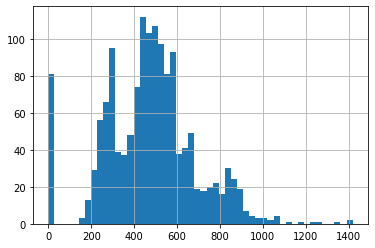

In [22]:
housing_train['GarageArea'].hist(bins=50);

In [23]:
loc, scale = expon.fit(housing_train['GarageArea'], floc=0)

In [24]:
loc, scale

(0.0, 472.9801369863014)

In [25]:
expon_dist = pd.Series(expon.rvs(loc=loc, scale=scale, size=1000))

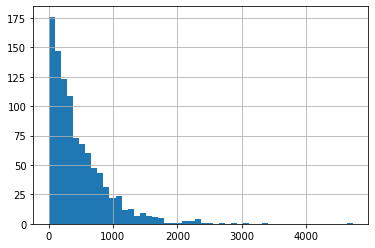

In [26]:
expon_dist.hist(bins=50);

##### 5th and 95th Percentiles of Exponential Distribution 

In [27]:
expon.ppf(.05, loc=loc, scale=scale), expon.ppf(.95, loc=loc, scale=scale)

(24.260709405902336, 1416.9218611198503)

##### 5th and 95th Percentiles of Data

In [28]:
expon_dist.quantile(.05), expon_dist.quantile(.95)

(29.543716251608842, 1348.8182459081877)

##### 5th and 95th Percentiles of Empirical Data

In [29]:
housing_train['GarageArea'].quantile(.05), housing_train['GarageArea'].quantile(.95)

(0.0, 850.0999999999999)

### 10 points.  Modeling.  Build some type of multiple regression  model and submit your model to the competition board.  Provide your complete model summary and results with analysis.  Report your Kaggle.com user name and score.

In [115]:
numerical_list = []
for col in housing_all.columns:
    if housing_all[col].dtype == 'int64' and col != 'Id' and col != 'MSSubClass' and col != 'index' :
        numerical_list.append(col)

In [116]:
housing_train_rev = housing_all.copy()

In [117]:
ordinal_cols = []
ordinal_dict = {'Ex': 5 ,'Gd': 4,'TA': 3,' Av': 3, 'Fa': 2,'Mn': 2, 'No': 1,'Po': 1,'Not Found': 2.9,
                'Typ': 5, 'Min1': 4, 'Min2': 3, 'Mod': 2, 'Maj1': 1, 'Maj2': 0, 'Sev': -1, 'Sal': -2}
for col in housing_train_rev.columns[housing_train_rev.columns.str.contains('Qual|Qu|QC|Cond|Functional') &
                                     ~housing_train_rev.columns.str.contains('Overall|Exter|Condition|FinSF')]:
    housing_train_rev[col] = housing_train_rev[col].fillna('Not Found').map(ordinal_dict)
    print(housing_train_rev[col].value_counts())
    ordinal_cols.append(col)

3.0    2606
4.0     122
2.0     104
2.9      82
1.0       5
Name: BsmtCond, dtype: int64
3.0    1283
4.0    1209
5.0     258
2.0      88
2.9      81
Name: BsmtQual, dtype: int64
2.9    1420
4.0     744
3.0     592
2.0      74
1.0      46
5.0      43
Name: FireplaceQu, dtype: int64
 5.0    2717
 3.0      70
 4.0      65
 2.0      35
 1.0      19
 0.0       9
 2.9       2
-1.0       2
Name: Functional, dtype: int64
3.0    2654
2.9     159
2.0      74
4.0      15
1.0      14
5.0       3
Name: GarageCond, dtype: int64
3.0    2604
2.9     159
2.0     124
4.0      24
1.0       5
5.0       3
Name: GarageQual, dtype: int64
5.0    1493
3.0     857
4.0     474
2.0      92
1.0       3
Name: HeatingQC, dtype: int64
3.0    1492
4.0    1151
5.0     205
2.0      70
2.9       1
Name: KitchenQual, dtype: int64
2.9    2909
4.0       4
5.0       4
2.0       2
Name: PoolQC, dtype: int64


##### Create dummy columns

In [118]:
dummy_cols = ['MSSubClass',
             'MSZoning',
             'Street',
             'Alley',
             'LotShape',
             'LandContour',
             'Utilities',
             'LandSlope',
             'LotConfig',
             'LandSlope',
             'Neighborhood',
             'Condition1',
             'Condition2',
             'BldgType',
             'HouseStyle',
             'RoofStyle',
             'RoofMatl',
             'Exterior1st',
             'Exterior2nd',
             'MasVnrType',
             'Foundation',
             'Electrical',
             'GarageType',
             'GarageFinish',
             'Fence',
             'MiscFeature',
             'SaleType',
             'SaleCondition']

In [119]:
all_cols = [*numerical_list,*ordinal_cols,*dummy_cols,]

housing_train_rev = housing_train_rev[set(all_cols)]

##### Get dummies

In [121]:
housing_train_dum = pd.get_dummies(housing_train_rev, 
                                   drop_first = False, 
                                   columns=dummy_cols)

In [122]:
housing_train_dum = housing_train_dum.astype(float)

In [135]:
housing_train_dum.head()

,2ndFlrSF,Functional,KitchenQual,WoodDeckSF,PoolQC,HalfBath,BedroomAbvGr,3SsnPorch,MiscVal,EnclosedPorch,OverallQual,ScreenPorch,Fireplaces,GarageCond,YearBuilt,YearRemodAdd,MoSold,TotRmsAbvGrd,YrSold,GarageQual,OpenPorchSF,BsmtQual,KitchenAbvGr,OverallCond,PoolArea,BsmtCond,GrLivArea,LowQualFinSF,1stFlrSF,FireplaceQu,LotArea,FullBath,HeatingQC,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,1stFlrSF_2ndFlrSF,1stFlrSF_3SsnPorch,1stFlrSF_BedroomAbvGr,1stFlrSF_EnclosedPorch,1stFlrSF_Fireplaces,1stFlrSF_FullBath,1stFlrSF_GrLivArea,1stFlrSF_HalfBath,1stFlrSF_KitchenAbvGr,1stFlrSF_LotArea,1stFlrSF_LowQualFinSF,1stFlrSF_MiscVal,1stFlrSF_MoSold,1stFlrSF_OpenPorchSF,1stFlrSF_OverallCond,1stFlrSF_OverallQual,1stFlrSF_PoolArea,1stFlrSF_ScreenPorch,1stFlrSF_TotRm

##### Get interaction terms

In [ ]:
for x,y in itertools.combinations([*numerical_list,*ordinal_cols],2):
    housing_train_dum['{}_{}'.format(x,y)] = housing_train_dum[x] * housing_train_dum[y]

##### Make a Basic Prediction

In [125]:
X_train = housing_train_dum[housing_all['test_train']=='train']
X_test = housing_train_dum[housing_all['test_train']=='test']
y_train = housing_train['SalePrice']

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.9618789150130297

##### R^2 and Adjusted R^2

In [126]:
lr.score(X_train, y_train), 1 - (1-lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

(0.9618789150130297, 0.9211082794383125)

##### Using Ridge

In [127]:
ridge = Ridge(alpha=1,
              normalize=True)
ridge.fit(X_train ,y_train)
ridge.score(X_train,y_train)

0.8950100358337996

##### Using Lasso with Gridsearch

In [128]:
pipe = Pipeline(steps=[('lasso', Lasso(normalize=True))])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'lasso__alpha': [1, 5, 10, 15, 20, 25, 30, 35, 40],
}
search = GridSearchCV(pipe, param_grid, n_jobs=20)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

/Users/jitsen/anaconda/envs/test-env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.818):
{'lasso__alpha': 30}


##### Using Ridge with Gridsearch

In [137]:
pipe = Pipeline(steps=[('ridge', Ridge(normalize=True))])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'ridge__alpha': [0.1, 1, 5, 10, 15, 20, 25, 30, 35, 40, 60],
}
search = GridSearchCV(pipe, param_grid, n_jobs=20)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

/Users/jitsen/anaconda/envs/test-env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.828):
{'ridge__alpha': 1}


##### Let's use the Ridge Model for Prediction

In [138]:
housing_test['SalePrice'] = search.predict(X_test.fillna(0))

In [139]:
housing_test[['Id', 'SalePrice']].to_csv('housing_test.csv',
                                         index=False)

### Scores

My Kaggle username is jitsen, and my score is 0.14945